In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

In [2]:
sns.set(style='whitegrid', palette='crest')

In [75]:
ruido=pd.read_csv('ruido_modificado.csv')

In [ ]:
ruido.drop(columns=['Unnamed: 0'], inplace=True)

In [19]:
ruido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62022 entries, 0 to 62021
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   borough                                  62022 non-null  int64  
 1   block                                    62022 non-null  int64  
 2   latitude                                 62022 non-null  float64
 3   longitude                                62022 non-null  float64
 4   year                                     62022 non-null  int64  
 5   week                                     62022 non-null  int64  
 6   day                                      62022 non-null  int64  
 7   hour                                     62022 non-null  int64  
 8   5-1_car-horn_presence                    62022 non-null  int64  
 9   5-2_car-alarm_presence                   62022 non-null  int64  
 10  5-3_siren_presence                       62022

In [48]:
def distritos(file_path, output_path):
    # Cargar el archivo CSV
    df = pd.read_csv(file_path)

    # Definir el diccionario de mapeo
    pulocationid_to_borough = {
        1:'Manhattan',4:'Queens',3: 'Brooklyn'
        }


    # Crear nuevas columnas mapeando 'PULocationID' y 'DOLocationID' a 'Boroughs'
    df['distritos'] = df['borough'].map(pulocationid_to_borough)
    print(df[['borough', 'distritos']].head())

        # Guardar el dataframe limpio en un nuevo archivo CSV
    df.to_csv(output_path, index=False)

    return df

In [49]:
file_path = 'ruido_limpio.csv'
output_path = 'ruidolimpiocondistritos.csv'
df_processed_and_cleaned = distritos(file_path, output_path)
print(df_processed_and_cleaned.head())

   borough  distritos
0        1  Manhattan
1        1  Manhattan
2        1  Manhattan
3        1  Manhattan
4        1  Manhattan
   Unnamed: 0  borough  block  latitude  longitude  year  week  day  hour  \
0           0        1    547  40.72951  -73.99388  2019    43    4     8   
1           1        1    547  40.72951  -73.99388  2019    43    4     8   
2           2        1    547  40.72951  -73.99388  2019    43    4     8   
3           3        1    547  40.72951  -73.99388  2019    43    4     8   
4           4        1    547  40.72951  -73.99388  2019    43    4     8   

   5-1_car-horn_presence  5-2_car-alarm_presence  5-3_siren_presence  \
0                     -1                      -1                  -1   
1                     -1                      -1                  -1   
2                     -1                      -1                  -1   
3                     -1                      -1                  -1   
4                      0                     

In [50]:
ruido=pd.read_csv('ruidolimpiocondistritos.csv')

In [64]:
import pandas as pd

def convertir_a_dummy(df, columnas_presencia):
    """
    Convierte las columnas especificadas en variables dummy donde cualquier valor diferente de 0 es convertido a 1.
    
    Args:
        df (pd.DataFrame): DataFrame a modificar.
        columnas_presencia (list): Lista de nombres de columnas a convertir.
    
    Returns:
        pd.DataFrame: DataFrame modificado con columnas convertidas en variables dummy.
    """
    # Convertir las columnas en dummy variables
    for columna in columnas_presencia:
        df[columna] = df[columna].apply(lambda x: 1 if x != 0 else 0)
    
    return df

# Ejemplo de uso
columnas_presencia = [
    '5-1_car-horn_presence', 
    '5-2_car-alarm_presence', 
    '5-3_siren_presence', 
    '5-4_reverse-beeper_presence', 
    '5-X_other-unknown-alert-signal_presence', 
    '6-2_mobile-music_presence', 
    '6-3_ice-cream-truck_presence'
]

# Supongamos que el DataFrame 'ruido' ya está cargado
ruido_modificado = convertir_a_dummy(ruido, columnas_presencia)

# Ver los primeros datos del DataFrame modificado
print(ruido_modificado.head())

# Guardar el DataFrame modificado en un nuevo archivo CSV
ruido_modificado.to_csv('ruido_modificado.csv', index=False)
print("Archivo guardado como 'ruido_modificado.csv'")


   borough  block  latitude  longitude  year  week  day  hour  \
0        1    547  40.72951  -73.99388  2019    43    4     8   
1        1    547  40.72951  -73.99388  2019    43    4     8   
2        1    547  40.72951  -73.99388  2019    43    4     8   
3        1    547  40.72951  -73.99388  2019    43    4     8   
4        1    547  40.72951  -73.99388  2019    43    4     8   

   5-1_car-horn_presence  5-2_car-alarm_presence  5-3_siren_presence  \
0                      1                       1                   1   
1                      1                       1                   1   
2                      1                       1                   1   
3                      1                       1                   1   
4                      0                       0                   0   

   5-4_reverse-beeper_presence  5-X_other-unknown-alert-signal_presence  \
0                            1                                        1   
1                         

In [65]:
ruido.head(2)

,borough,block,latitude,longitude,year,week,day,hour,5-1_car-horn_presence,5-2_car-alarm_presence,5-3_siren_presence,5-4_reverse-beeper_presence,5-X_other-unknown-alert-signal_presence,6-2_mobile-music_presence,6-3_ice-cream-truck_presence,distritos
0,1,547,40.72951,-73.99388,2019,43,4,8,1,1,1,1,1,1,1,Manhattan
1,1,547,40.72951,-73.99388,2019,43,4,8,1,1,1,1,1,1,1,Manhattan


In [67]:
ruido.describe()

,borough,block,latitude,longitude,year,week,day,hour,5-1_car-horn_presence,5-2_car-alarm_presence,5-3_siren_presence,5-4_reverse-beeper_presence,5-X_other-unknown-alert-signal_presence,6-2_mobile-music_presence,6-3_ice-cream-truck_presence
count,62022.000000,62022.000000,62022.00000,62022.000000,62022.000000,62022.000000,62022.000000,62022.000000,62022.000000,62022.000000,62022.000000,62022.000000,62022.000000,62022.000000,62022.000000
mean,1.114943,593.343878,40.73031,-73.993044,2017.591000,26.274838,2.907259,12.417578,0.152607,0.076537,0.111460,0.101496,0.083470,0.085921,0.080342
std,0.472653,251.373182,0.01348,0.010074,0.778948,16.169650,1.925728,5.824993,0.359611,0.265858,0.314704,0.301987,0.276594,0.280250,0.271825
min,1.000000,75.000000,40.67517,-74.015760,2016.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,535.000000,40.72898,-73.996820,2017.000000,12.000000,1.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,547.000000,40.73033,-73.995000,2017.000000,27.000000,3.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,550.000000,40.73142,-73.992860,2018.000000,41.000000,4.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,2613.000000,40.77991,-73.851840,2019.000000,52.000000,6.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [76]:
ruido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62022 entries, 0 to 62021
Data columns (total 16 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   borough                                  62022 non-null  int64  
 1   block                                    62022 non-null  int64  
 2   latitude                                 62022 non-null  float64
 3   longitude                                62022 non-null  float64
 4   year                                     62022 non-null  int64  
 5   week                                     62022 non-null  int64  
 6   day                                      62022 non-null  int64  
 7   hour                                     62022 non-null  int64  
 8   5-1_car-horn_presence                    62022 non-null  int64  
 9   5-2_car-alarm_presence                   62022 non-null  int64  
 10  5-3_siren_presence                       62022

In [77]:
ruido.isnull().sum()

borough                                    0
block                                      0
latitude                                   0
longitude                                  0
year                                       0
week                                       0
day                                        0
hour                                       0
5-1_car-horn_presence                      0
5-2_car-alarm_presence                     0
5-3_siren_presence                         0
5-4_reverse-beeper_presence                0
5-X_other-unknown-alert-signal_presence    0
6-2_mobile-music_presence                  0
6-3_ice-cream-truck_presence               0
distritos                                  0
dtype: int64

In [78]:
ruido.duplicated().sum()

39207

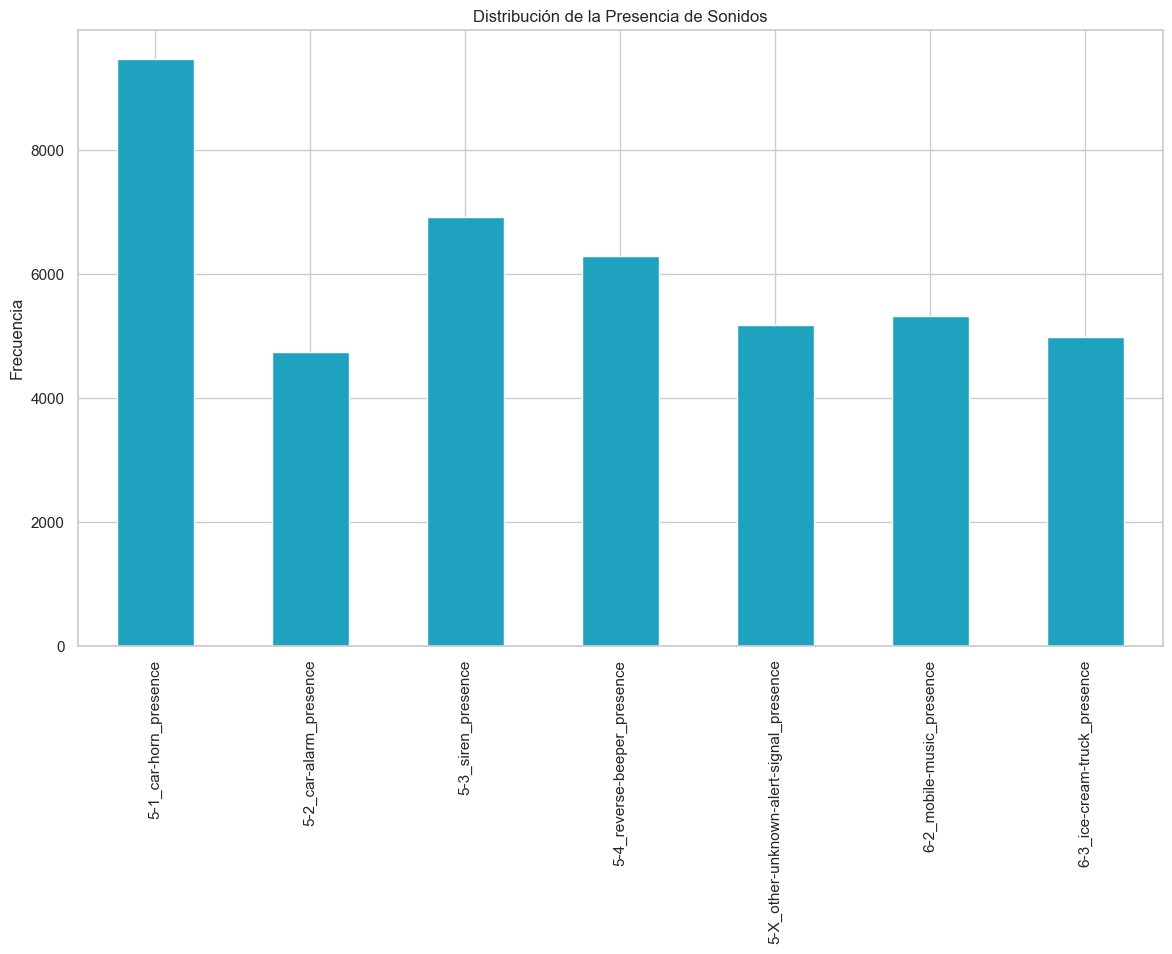

In [79]:
plt.figure(figsize=(14, 8))
ruido[['5-1_car-horn_presence', '5-2_car-alarm_presence', '5-3_siren_presence', 
    '5-4_reverse-beeper_presence', '5-X_other-unknown-alert-signal_presence', 
    '6-2_mobile-music_presence', '6-3_ice-cream-truck_presence']].sum().plot(kind='bar', color='#1FA2BF')
plt.title('Distribución de la Presencia de Sonidos')
plt.ylabel('Frecuencia')
plt.show()


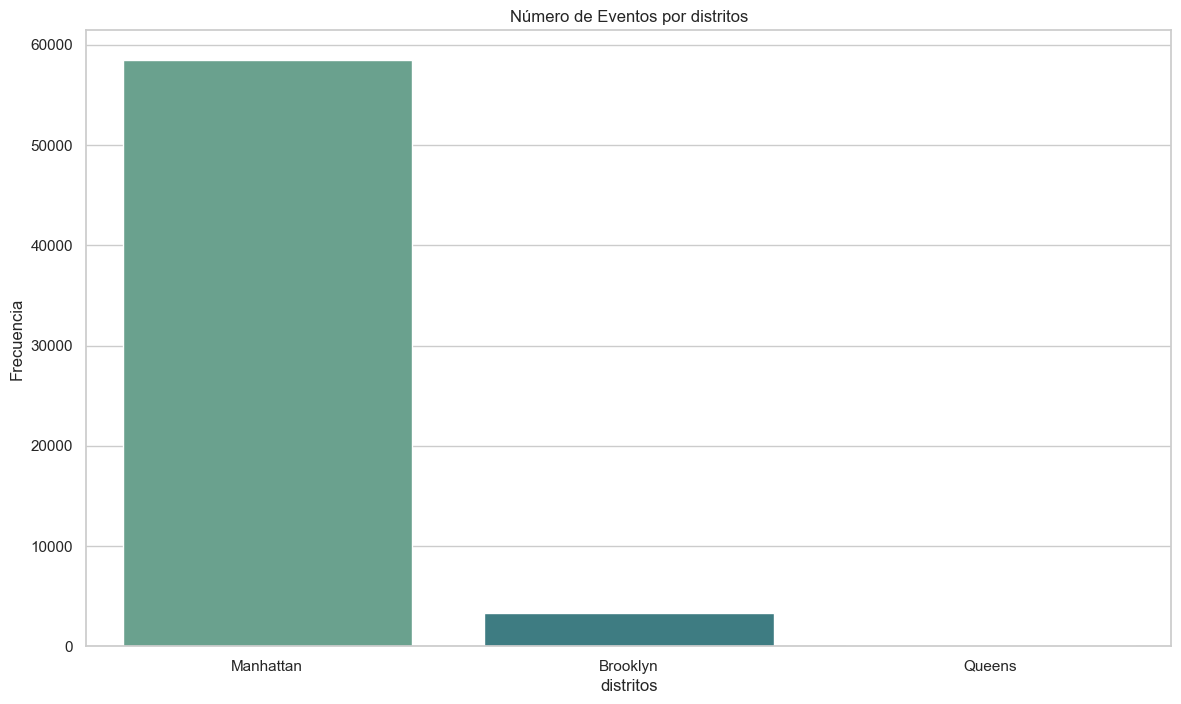

In [80]:
plt.figure(figsize=(14, 8))
sns.countplot(x='distritos', data=ruido, palette='crest')
plt.title('Número de Eventos por distritos')
plt.xlabel('distritos')
plt.ylabel('Frecuencia')
plt.show()


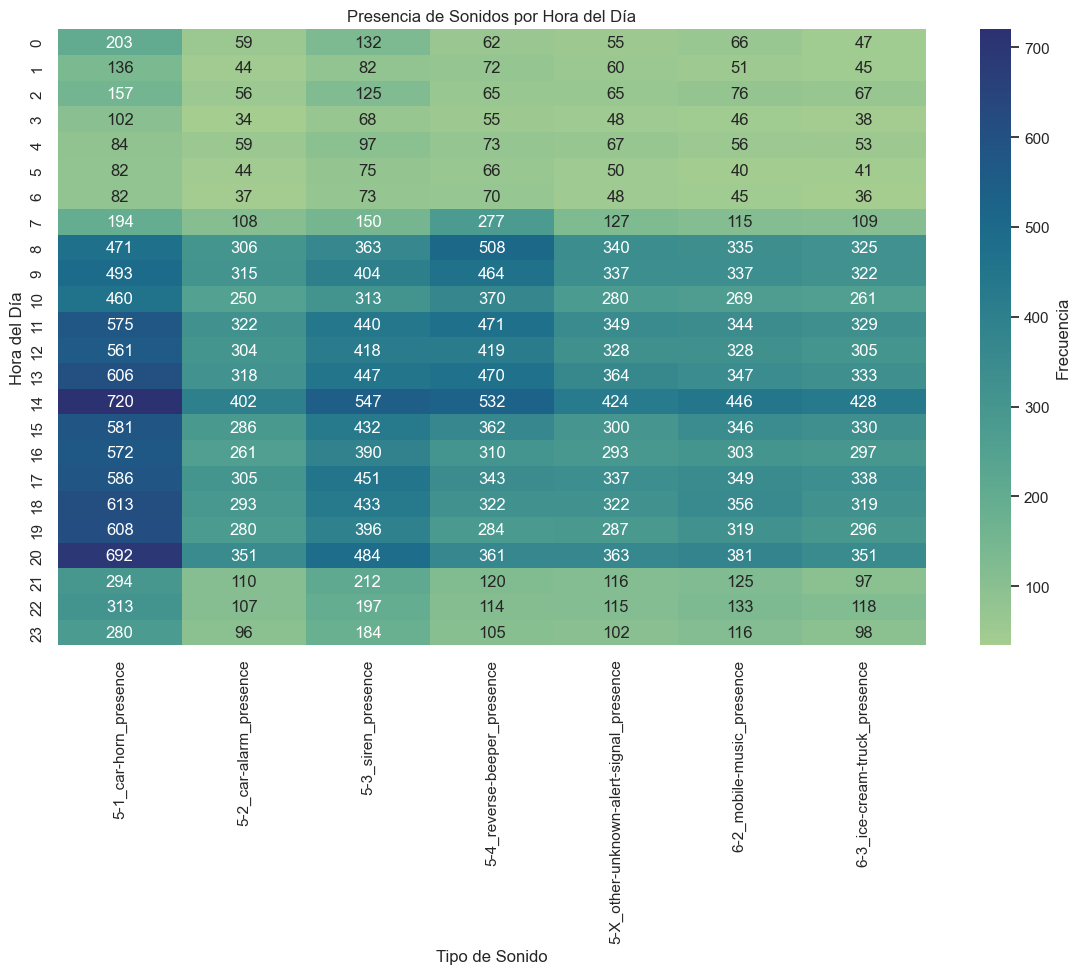

In [ ]:
grupo_hora = ruido.groupby('hour')[['5-1_car-horn_presence', '5-2_car-alarm_presence', '5-3_siren_presence', 
    '5-4_reverse-beeper_presence', '5-X_other-unknown-alert-signal_presence', 
    '6-2_mobile-music_presence', '6-3_ice-cream-truck_presence']].sum()

# Crear el heatmap con formato de números enteros
plt.figure(figsize=(14, 8))
sns.heatmap(grupo_hora, cmap='crest', annot=True, fmt='d', cbar_kws={'label': 'Frecuencia'})
plt.title('Presencia de Sonidos por Hora del Día')
plt.ylabel('Hora del Día')
plt.xlabel('Tipo de Sonido')
plt.xticks(rotation=90)
plt.show()


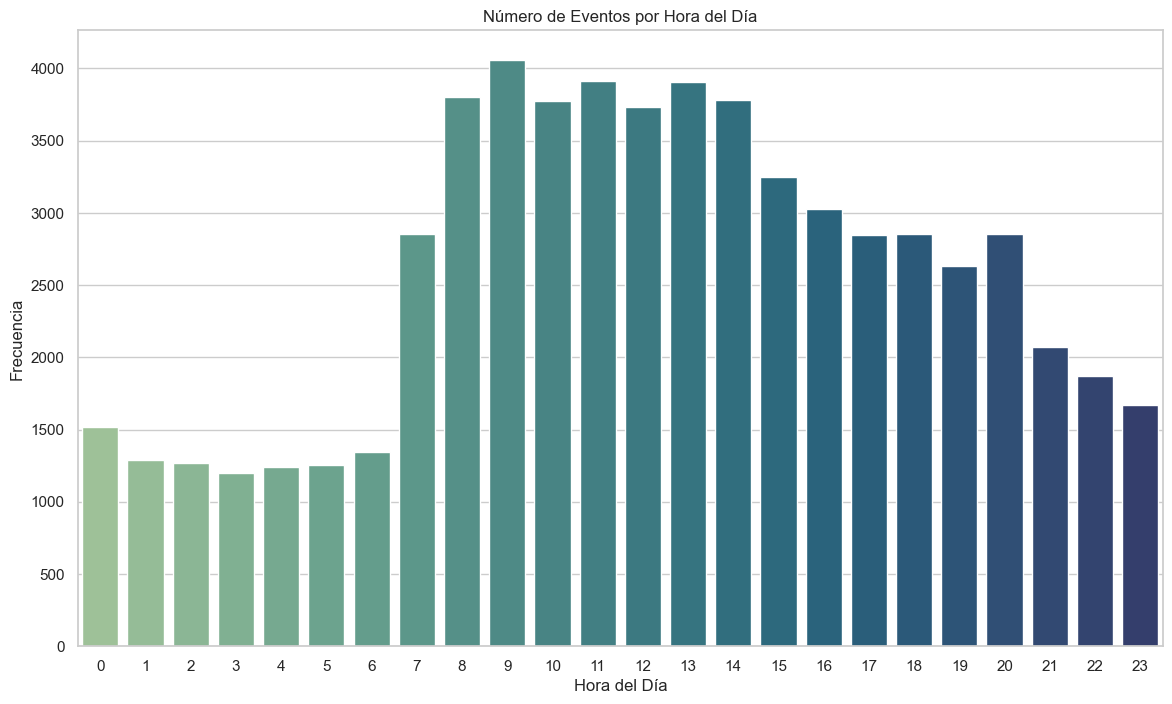

In [89]:
plt.figure(figsize=(14, 8))
sns.countplot(x='hour', data=ruido, palette='crest')
plt.title('Número de Eventos por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Frecuencia')
plt.show()


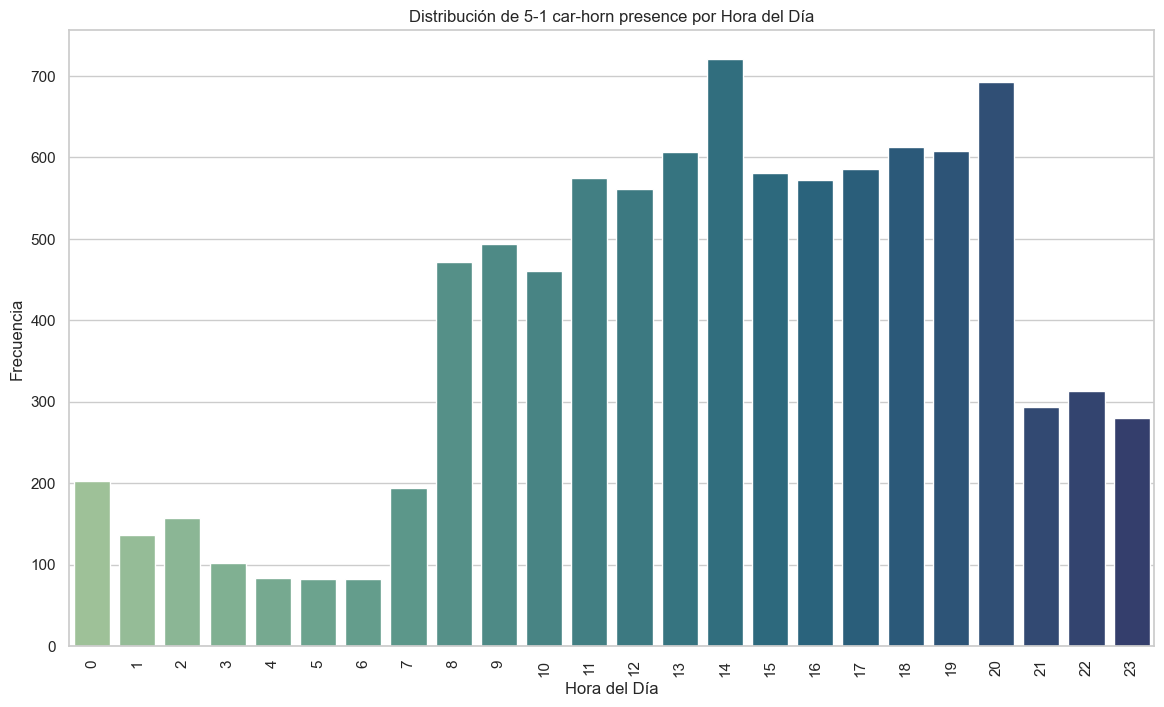

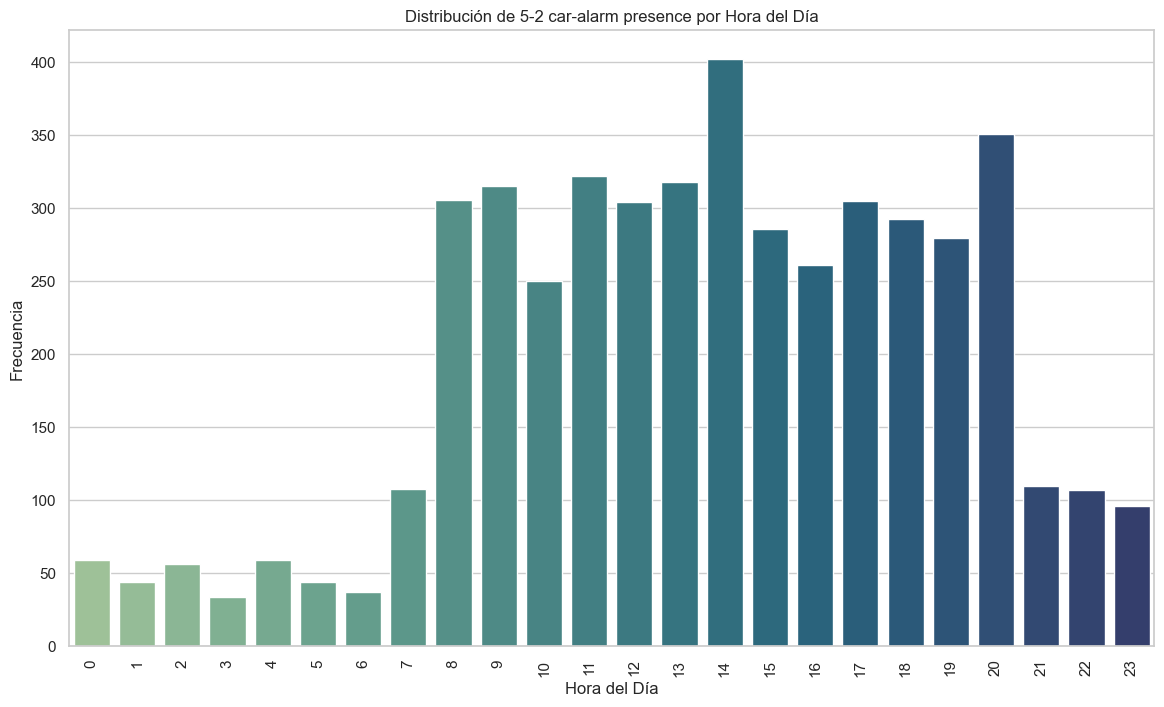

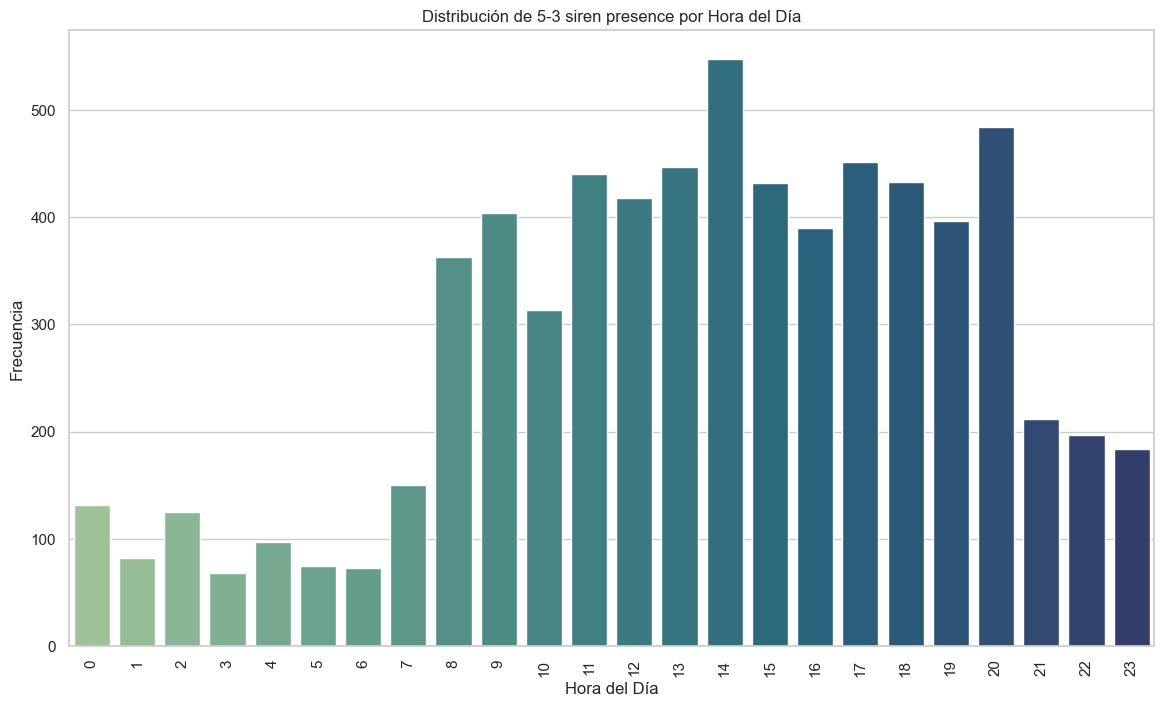

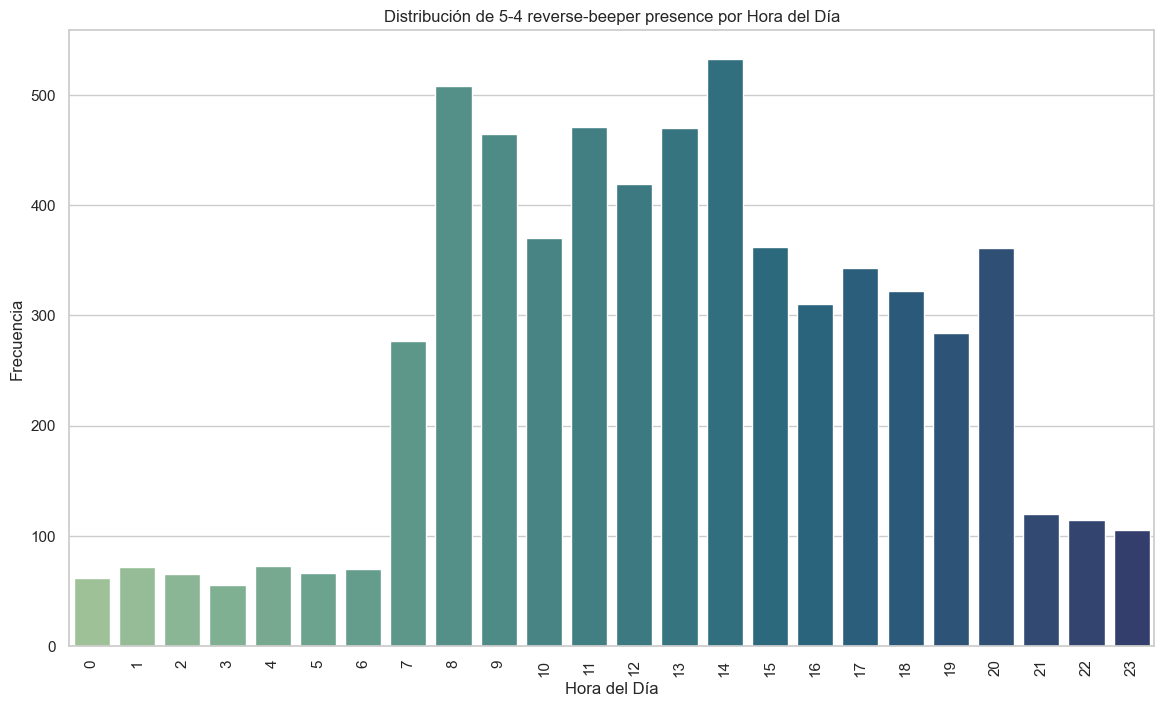

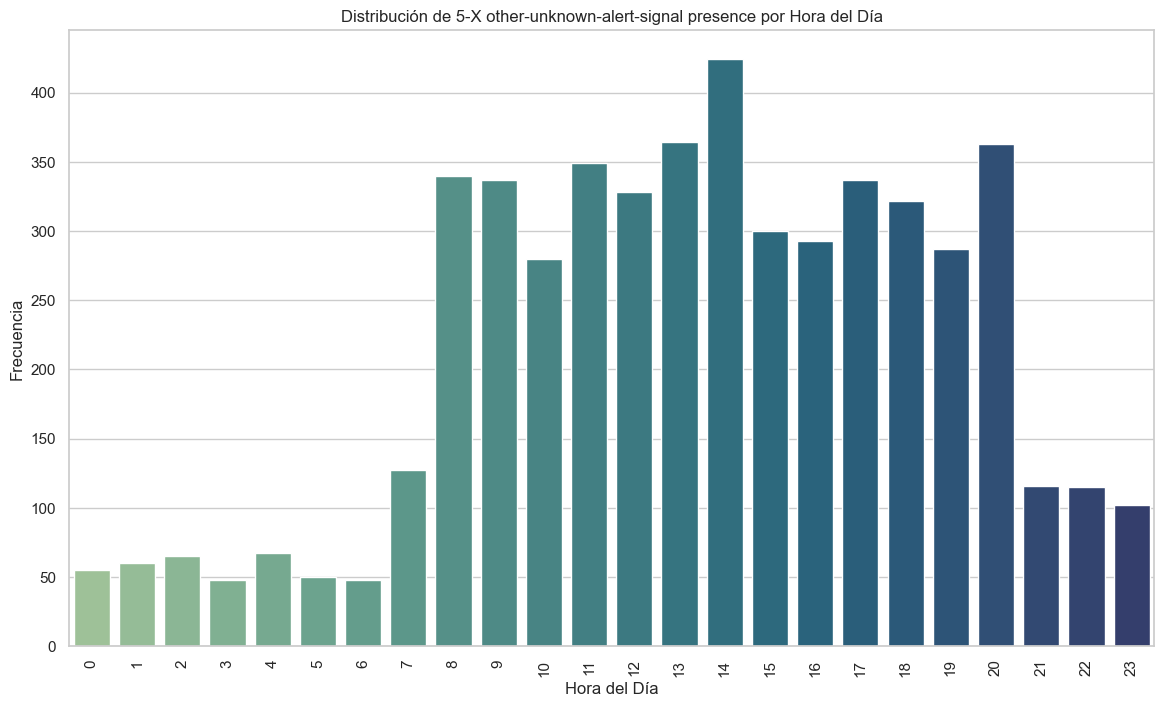

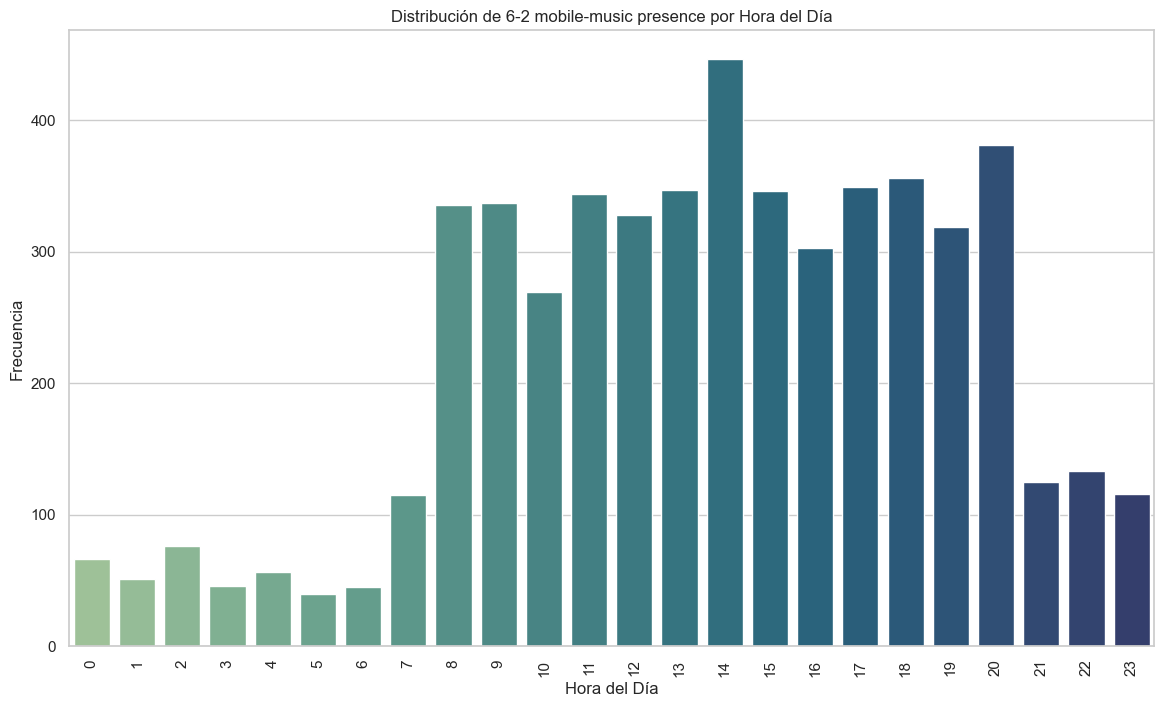

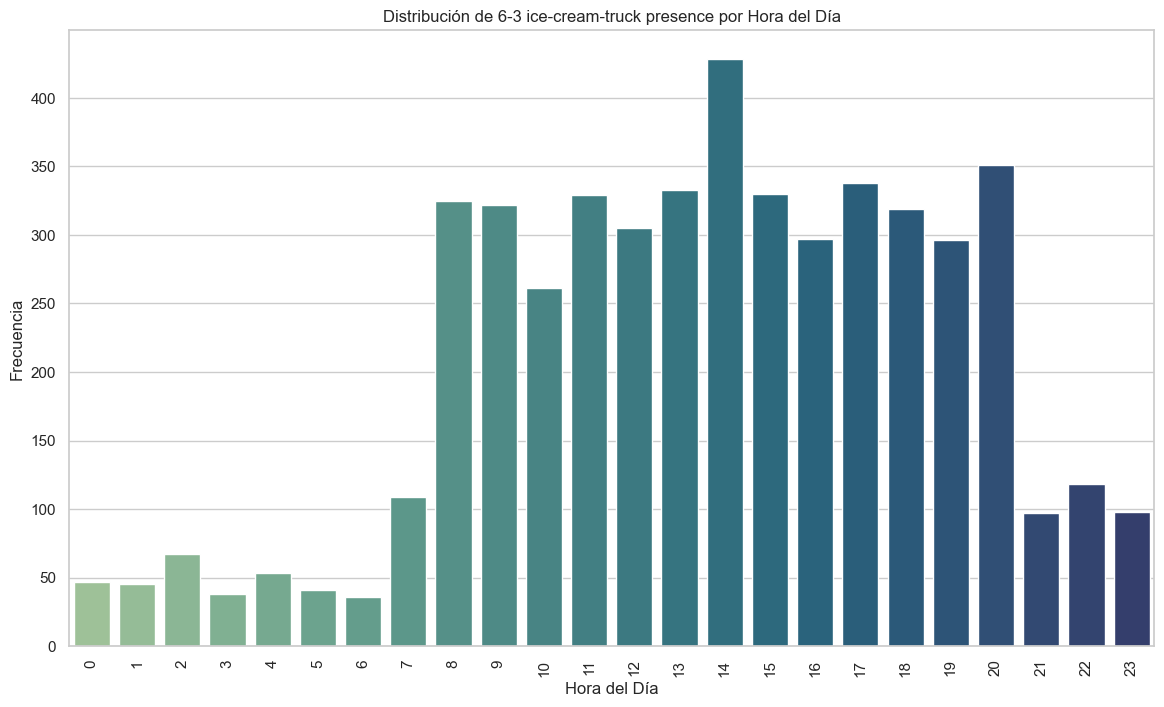

In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Asumiendo que el DataFrame 'ruido' ya está cargado y contiene las columnas convertidas en dummy variables

# Lista de columnas de presencia de sonidos
columnas_presencia = [
    '5-1_car-horn_presence', 
    '5-2_car-alarm_presence', 
    '5-3_siren_presence', 
    '5-4_reverse-beeper_presence', 
    '5-X_other-unknown-alert-signal_presence', 
    '6-2_mobile-music_presence', 
    '6-3_ice-cream-truck_presence'
]

# Crear gráficos de barras para cada tipo de sonido
for columna in columnas_presencia:
    plt.figure(figsize=(14, 8))
    sns.countplot(x='hour', data=ruido[ruido[columna] == 1], palette='crest')
    plt.title(f'Distribución de {columna.replace("_", " ")} por Hora del Día')
    plt.xlabel('Hora del Día')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=90)
    plt.show()


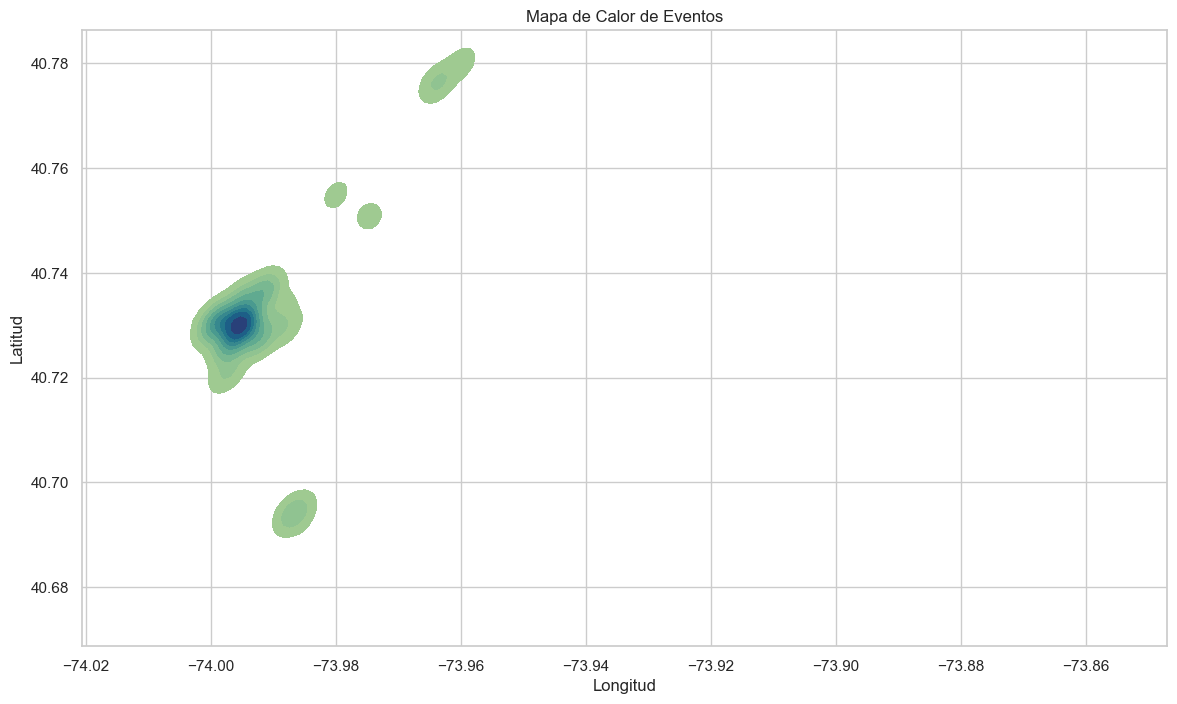

In [90]:
plt.figure(figsize=(14, 8))
sns.kdeplot(data=ruido, x='longitude', y='latitude', cmap='crest', fill=True)
plt.title('Mapa de Calor de Eventos')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()
